In [83]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn import linear_model
import numpy as np
from sklearn import svm

In [84]:
def load_dataset_withfeatures_pandas(dataset_path):
    """This function loads CSV datasets using the read_csv method of the pandas library.
    The CSV is epxected to be comma-separated, while sepaX_train, train_test_splitrate examples are separated by new line.
    All but the last column are expected to be features, the last columns is parsed as output variable."""
    df = pd.read_csv(dataset_path)

    X = df.iloc[:, :-1].to_numpy()
    y = df.iloc[:, -1].to_numpy()

    feature_names = df.iloc[:, :-1].columns.tolist()

    return X, y, feature_names

In [85]:
def standard_scale_data(X_train, X_test):
    # TODO: It won't hurt to scale your data in most cases
    # How do you do that? Choose from the methods you learned
    # Hint: The data was not artificial changed to create certain
    # advantages of a scaler, they are taken from source unprocessed.
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test

## 2D moon dataset

In [86]:
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, marker='o', s=50)
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

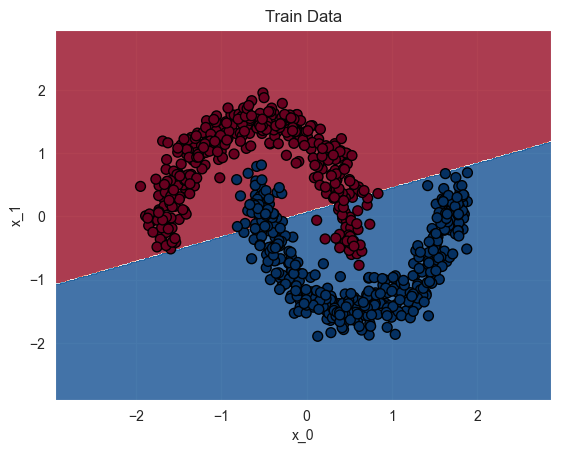

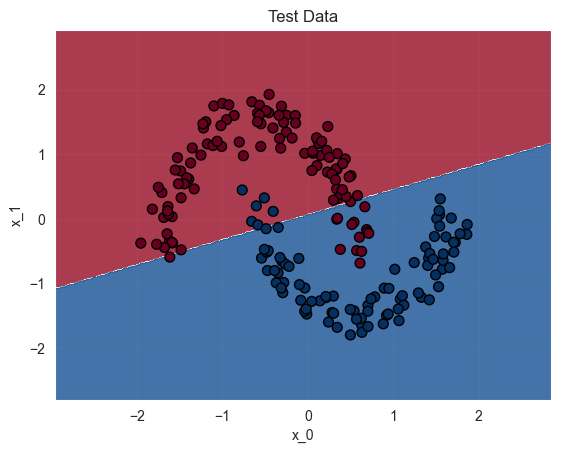

Train:
Precision: 0.890
Recall: 0.899
Test:
Precision: 0.934
Recall: 0.859


In [87]:
# SVM
clf = LinearSVC(dual="auto")
# load data
X, y, feature_names = load_dataset_withfeatures_pandas("moons.csv")
# build test set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=20)
x_train, x_test = standard_scale_data(x_train, x_test)
# train classifiers
clf.fit(x_train, y_train)
y_train_predict = clf.predict(x_train)
y_test_predict = clf.predict(x_test)
# visualize decision boundaries
plot_decision_boundary(x_train, y_train, clf, "Train Data")
plot_decision_boundary(x_test, y_test, clf, "Test Data")
# look at metrics
print(f"Train:")
print(f"Precision: {precision_score(y_train_predict, y_train):.3f}")
print(f"Recall: {recall_score(y_train_predict, y_train):.3f}")
print(f"Test:")
print(f"Precision: {precision_score(y_test_predict, y_test):.3f}")
print(f"Recall: {recall_score(y_test_predict, y_test):.3f}")

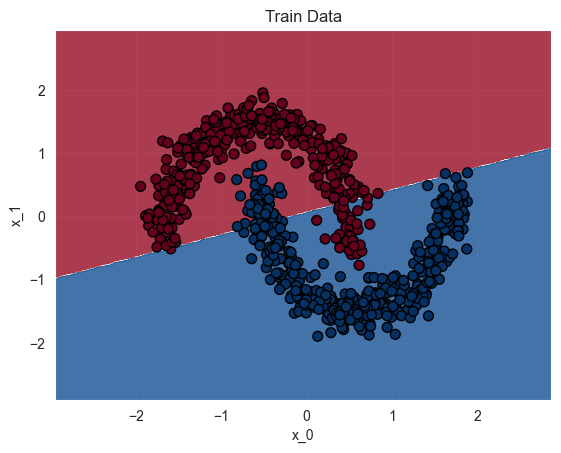

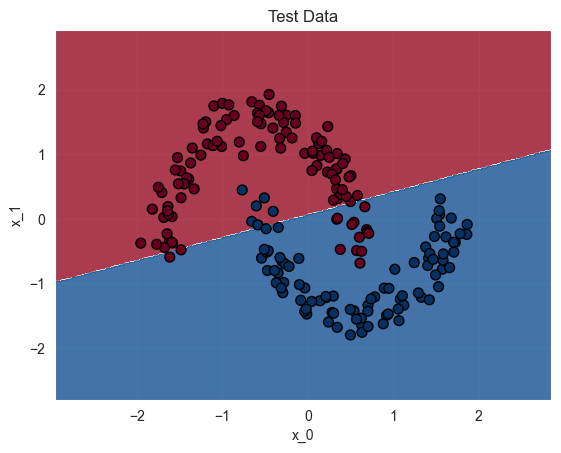

Train:
Precision: 0.890
Recall: 0.899
Test:
Precision: 0.934
Recall: 0.850


In [88]:
# Logistic Regression
logr = linear_model.LogisticRegression()

X, y, _ = load_dataset_withfeatures_pandas("moons.csv")

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=20)
x_train, x_test = standard_scale_data(x_train, x_test)

logr.fit(x_train, y_train)

y_train_predict = logr.predict(x_train)
y_test_predict = logr.predict(x_test)

plot_decision_boundary(x_train, y_train, logr, title="Train Data")
plot_decision_boundary(x_test, y_test, logr, title="Test Data")

print(f"Train:")
print(f"Precision: {precision_score(y_train_predict, y_train):.3f}")
print(f"Recall: {recall_score(y_train_predict, y_train):.3f}")
print(f"Test:")
print(f"Precision: {precision_score(y_test_predict, y_test):.3f}")
print(f"Recall: {recall_score(y_test_predict, y_test):.3f}")

## 2D iris dataset

In [89]:
# load data
x, y, names = load_dataset_withfeatures_pandas("iris_2D.csv")
# build test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=20)
# train classifiers -> this is a multi class problem!
svm = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)

y_pred = svm.predict(x_test)
# visualize decision boundaries
# TODO

# look at metrics
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
print('Recall (Polynomial Kernel): ', "%.2f" % (recall*100))
print('Precision (Polynomial Kernel): ', "%.2f" % (precision*100))


Recall (Polynomial Kernel):  70.00
Precision (Polynomial Kernel):  70.06


## Credit card fraud

Train:
Precision: 0.740
Recall: 0.915
Test:
Precision: 0.480
Recall: 0.800


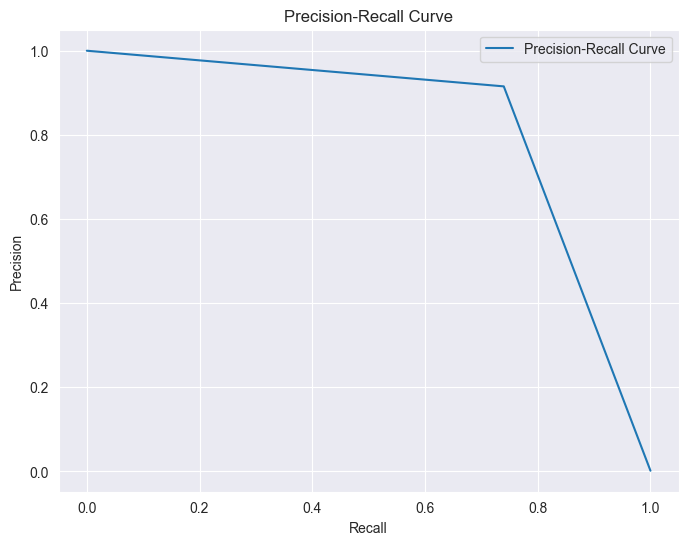

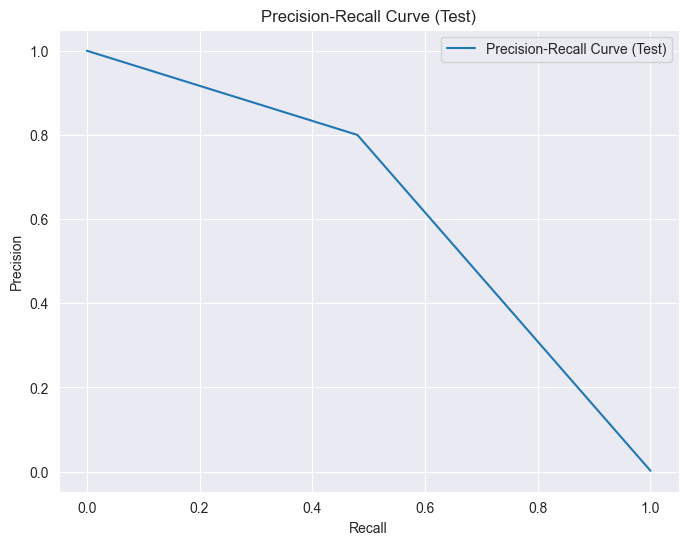

In [94]:
# Logistic Regression
from sklearn.metrics import precision_recall_curve
logr = linear_model.LogisticRegression()

X, y, _ = load_dataset_withfeatures_pandas("creditcard_20percent_sample.csv")

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=20)
x_train, x_test = standard_scale_data(x_train, x_test)

logr.fit(x_train, y_train)

y_train_predict = logr.predict(x_train)
y_test_predict = logr.predict(x_test)

print(f"Train:")
print(f"Precision: {precision_score(y_train_predict, y_train):.3f}")
print(f"Recall: {recall_score(y_train_predict, y_train):.3f}")
print(f"Test:")
print(f"Precision: {precision_score(y_test_predict, y_test):.3f}")
print(f"Recall: {recall_score(y_test_predict, y_test):.3f}")

# Precision-Recall-Curve
precision, recall, threshhold = precision_recall_curve(y_train, y_train_predict)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

precision, recall, threshhold = precision_recall_curve(y_test, y_test_predict)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (Test)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.legend()
plt.show()

# Decide by yourself: What does the Curve tell you? How to choose?


Train:
Precision: 0.781
Recall: 0.919
Test:
Precision: 0.600
Recall: 0.882


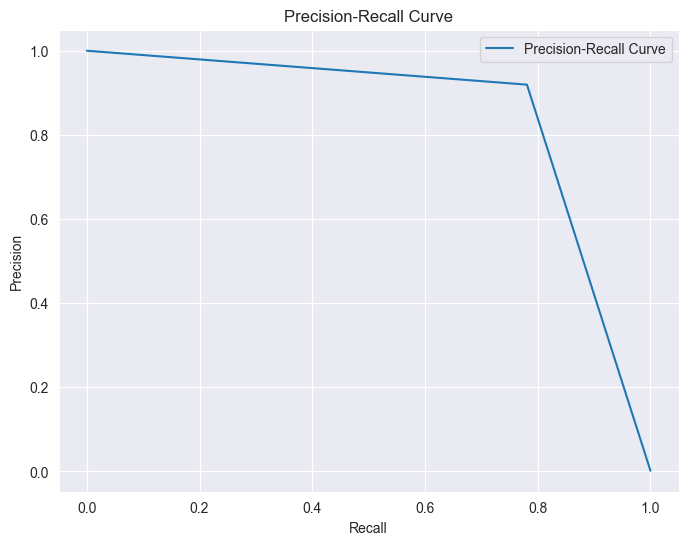

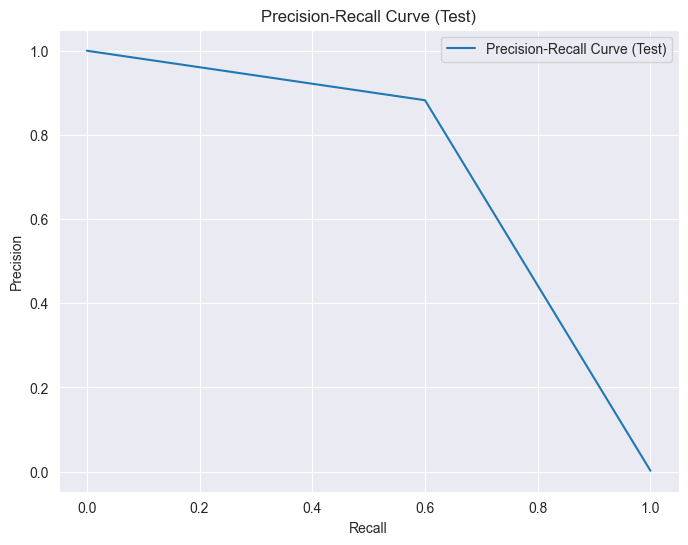

In [95]:
# SVMn
from sklearn.metrics import precision_recall_curve
svm = LinearSVC(dual="auto")

X, y, _ = load_dataset_withfeatures_pandas("creditcard_20percent_sample.csv")

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=20)
x_train, x_test = standard_scale_data(x_train, x_test)

svm.fit(x_train, y_train)

y_train_predict = svm.predict(x_train)
y_test_predict = svm.predict(x_test)

print(f"Train:")
print(f"Precision: {precision_score(y_train_predict, y_train):.3f}")
print(f"Recall: {recall_score(y_train_predict, y_train):.3f}")
print(f"Test:")
print(f"Precision: {precision_score(y_test_predict, y_test):.3f}")
print(f"Recall: {recall_score(y_test_predict, y_test):.3f}")

# Precision-Recall-Curve
precision, recall, threshhold = precision_recall_curve(y_train, y_train_predict)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

precision, recall, threshhold = precision_recall_curve(y_test, y_test_predict)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (Test)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.legend()
plt.show()

# Decide by yourself: What does the Curve tell you? How to choose?

In [96]:
# Ich würde die Kurve der SVM-Regression mehr empfehlen, da diese weiter "oben rechts" ist.
# Das bedeutet, dass sowohl Precision, als auch Recall einen besseren Wert haben, da diese
# Kurve das Verhältnis aus beiden Ergebnissen abbildet. Dies spiegelt sich auch im Print wieder.
# Dort ist die SVM im Trainingsfall bei beiden Werten besser, als die Logistic Regression.